### Importing libraries

In [102]:
#Installing Libraries
# !pip install seaborn
# !pip install opendatasets
# !pip install pandas

In [103]:
#Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


### Importing dataset

In [104]:
import opendatasets as od
import pandas as pd
 
od.download("https://www.kaggle.com/datasets/iammustafatz/diabetes-prediction-dataset")

Skipping, found downloaded files in ".\diabetes-prediction-dataset" (use force=True to force download)


In [105]:
dataset_path = "./diabetes-prediction-dataset/diabetes_prediction_dataset.csv"


In [106]:
df = pd.read_csv(dataset_path)

In [107]:
encodings_to_try = ['utf-8', 'latin1']  # Add more encodings if needed
for encoding in encodings_to_try:
    try:
        df = pd.read_csv(dataset_path, encoding=encoding)
        break  # Stop if successful
    except UnicodeDecodeError:
        continue  # Try the next encoding

### Prints basic info about the dataframe

In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


### Prints information about the dimension of the dataframe 

In [109]:
df.shape

(100000, 9)

### The head function prints the first n-rows. (default = 5)

In [110]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


### Prints the number of missing values in each column

In [111]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

### Prints the datatype of each column

In [112]:
df.dtypes

gender                  object
age                    float64
hypertension             int64
heart_disease            int64
smoking_history         object
bmi                    float64
HbA1c_level            float64
blood_glucose_level      int64
diabetes                 int64
dtype: object

### Prints the summary statistics for each numerical column

In [113]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


### Prints the unique values in categorical column

In [114]:
df.nunique()

gender                    3
age                     102
hypertension              2
heart_disease             2
smoking_history           6
bmi                    4247
HbA1c_level              18
blood_glucose_level      18
diabetes                  2
dtype: int64

# Preprocessing data

In [115]:
from sklearn.preprocessing import MinMaxScaler 

In [116]:
#columns to normalize
columns_to_normalize = ['blood_glucose_level', 'bmi']

In [117]:
scaler = MinMaxScaler()
df[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])

In [118]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,0.177171,6.6,0.272727,0
1,Female,54.0,0,0,No Info,0.202031,6.6,0.000000,0
2,Male,28.0,0,0,never,0.202031,5.7,0.354545,0
3,Female,36.0,0,0,current,0.156863,5.0,0.340909,0
4,Male,76.0,1,1,current,0.118231,4.8,0.340909,0


In [119]:
df.describe

<bound method NDFrame.describe of        gender   age  hypertension  heart_disease smoking_history       bmi  \
0      Female  80.0             0              1           never  0.177171   
1      Female  54.0             0              0         No Info  0.202031   
2        Male  28.0             0              0           never  0.202031   
3      Female  36.0             0              0         current  0.156863   
4        Male  76.0             1              1         current  0.118231   
...       ...   ...           ...            ...             ...       ...   
99995  Female  80.0             0              0         No Info  0.202031   
99996  Female   2.0             0              0         No Info  0.085901   
99997    Male  66.0             0              0          former  0.207983   
99998  Female  24.0             0              0           never  0.296569   
99999  Female  57.0             0              0         current  0.144958   

       HbA1c_level  blood_glu

In [120]:
#remove rows which don't have smoking history information
df = df.drop(df[df['smoking_history'] == 'No Info'].index)
df = df.drop(df[df['smoking_history'] == 'ever'].index)


In [121]:
df["smoking_history"].unique()

array(['never', 'current', 'former', 'not current'], dtype=object)

In [122]:
df['smoking_history'] = df['smoking_history'].replace(['never', 'former', 'current' , 'not current'], [0,1,2,3])
df["smoking_history"].unique()


array([0, 2, 1, 3], dtype=int64)

In [123]:
#Changing gender from Male and Female to 1 and 0
df["gender"]=(df["gender"] == "Male").astype(int)

## Examining the data through visualization

### Gender Distribution Graph

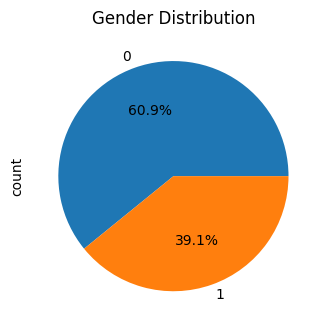

In [124]:
plt.subplot(1, 2, 1)
df['gender'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Gender Distribution')
plt.tight_layout()
plt.show()

### Age Distribution

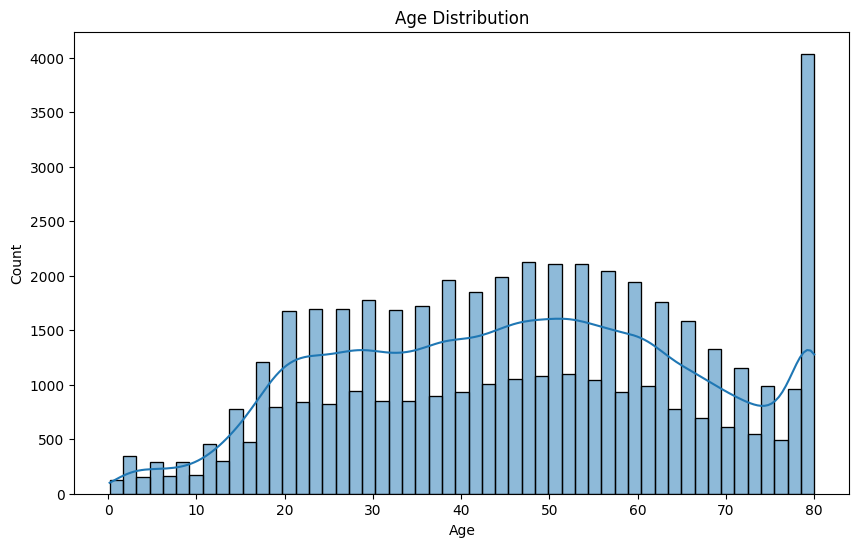

In [125]:
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

### Hypertension Distribution

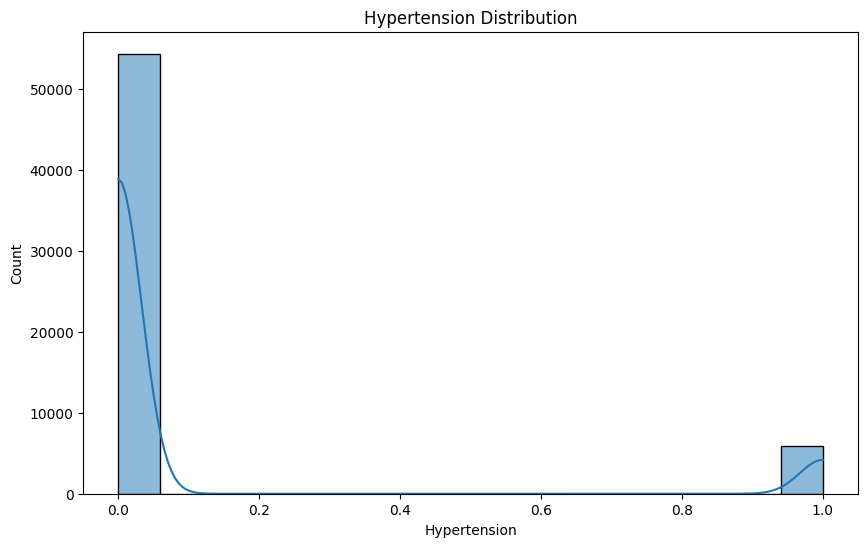

In [126]:
plt.figure(figsize=(10, 6))
sns.histplot(df['hypertension'], kde=True)
plt.title('Hypertension Distribution')
plt.xlabel('Hypertension')
plt.ylabel('Count')
plt.show()

### Heart Disease

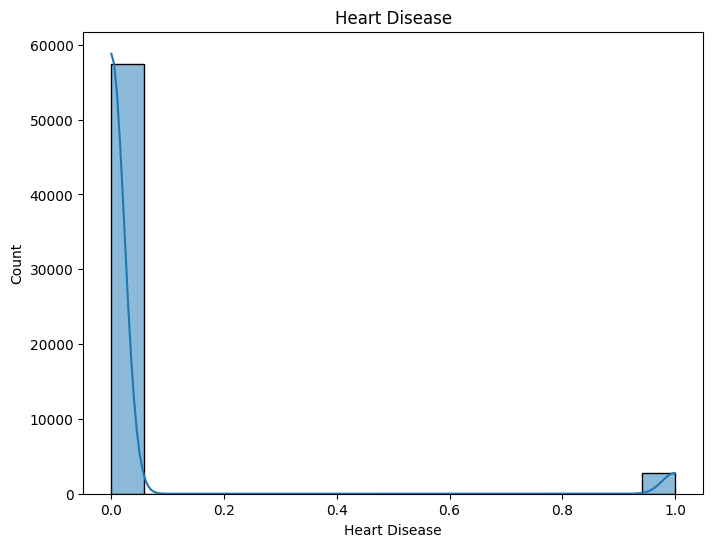

In [127]:
plt.figure(figsize=(8, 6))
sns.histplot(df['heart_disease'], kde=True)
plt.title('Heart Disease')
plt.xlabel('Heart Disease')
plt.ylabel('Count')
plt.show()

### Smoking History Distribution

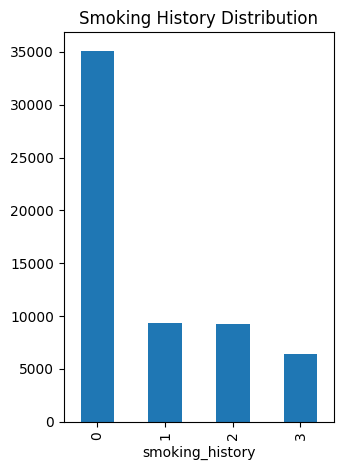

In [128]:
plt.subplot(1, 2, 2)
df['smoking_history'].value_counts().plot(kind='bar')
plt.title('Smoking History Distribution')

plt.tight_layout()
plt.show()


### BMI

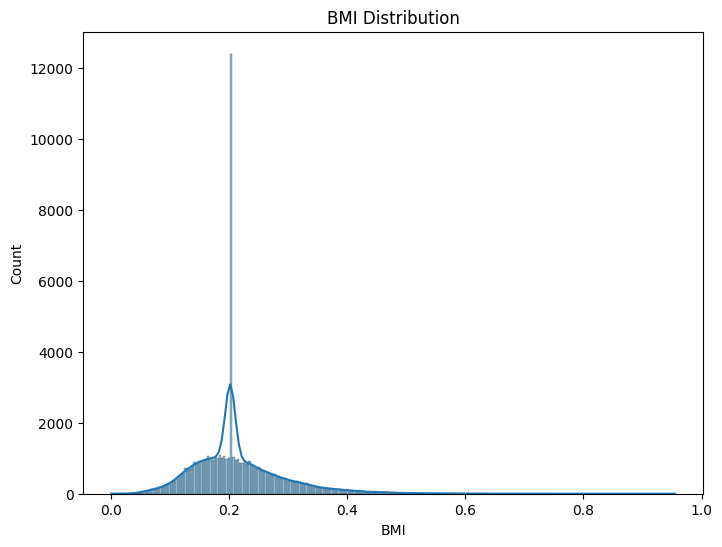

In [129]:
plt.figure(figsize=(8, 6))
sns.histplot(df['bmi'], kde=True)
plt.title('BMI Distribution')
plt.xlabel('BMI')
plt.ylabel('Count')
plt.show()

### HbA1c Level Distribution

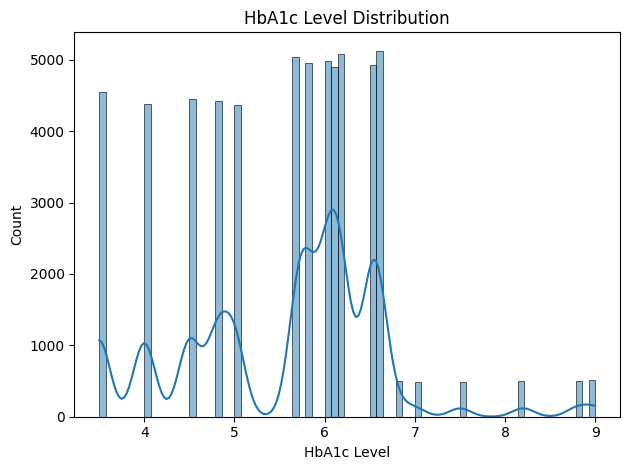

In [130]:
plt.subplot(1, 1, 1)
sns.histplot(df['HbA1c_level'], kde=True)
plt.title('HbA1c Level Distribution')
plt.xlabel('HbA1c Level')

plt.tight_layout()
plt.show()

### Blood Glucose Level

Text(0.5, 0, 'Blood Glucose Level')

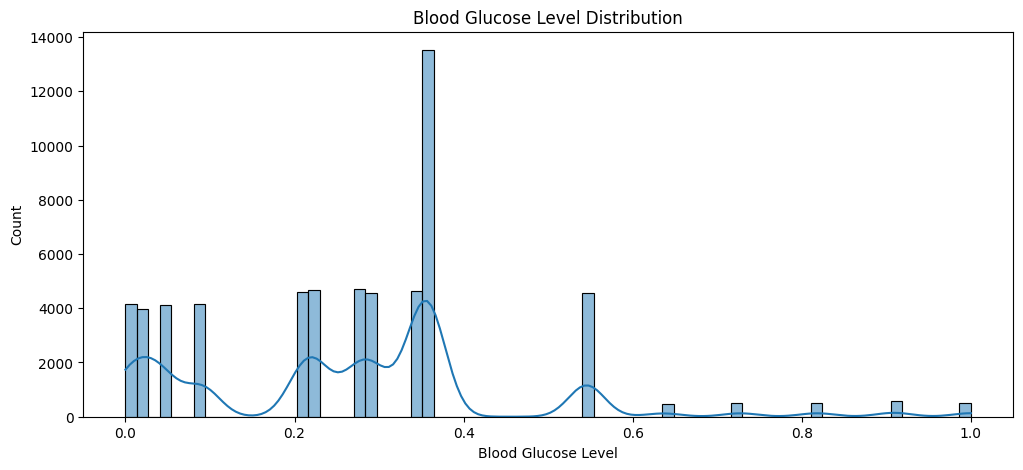

In [131]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 1, 1)
sns.histplot(df['blood_glucose_level'], kde=True)
plt.title('Blood Glucose Level Distribution')
plt.xlabel('Blood Glucose Level')

### Diabetes

Text(0.5, 0, 'Diabetes Glucose Level')

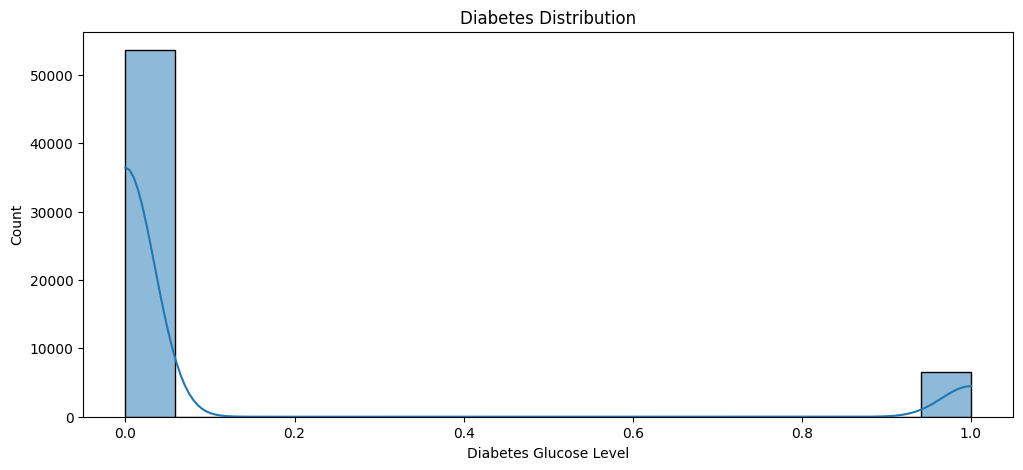

In [151]:
plt.figure(figsize=(12, 5))
plt.subplot(1,1,1)
sns.histplot(df['diabetes'], kde=True)
plt.title('Diabetes Distribution')
plt.xlabel('Diabetes Glucose Level')

## Checks for Outliers

<Axes: xlabel='age', ylabel='Count'>

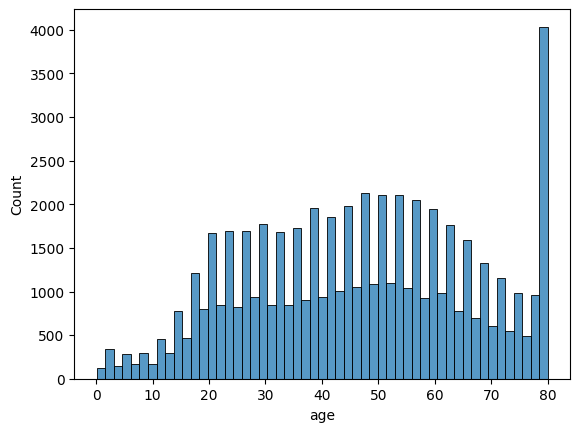

In [133]:
#checking for outliers
sns.histplot(df["age"])

# Age Vs Heart Disease

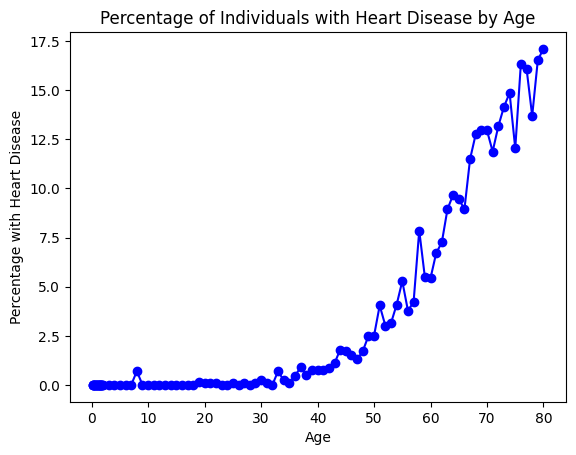

In [134]:
age_grouped = df.groupby('age')['heart_disease'].mean() * 100  
plt.plot(age_grouped.index, age_grouped.values, marker='o', linestyle='-', color='b')
plt.xlabel('Age')
plt.ylabel('Percentage with Heart Disease')
plt.title('Percentage of Individuals with Heart Disease by Age')

plt.show()

# Smoking History VS Blood Glucose Level

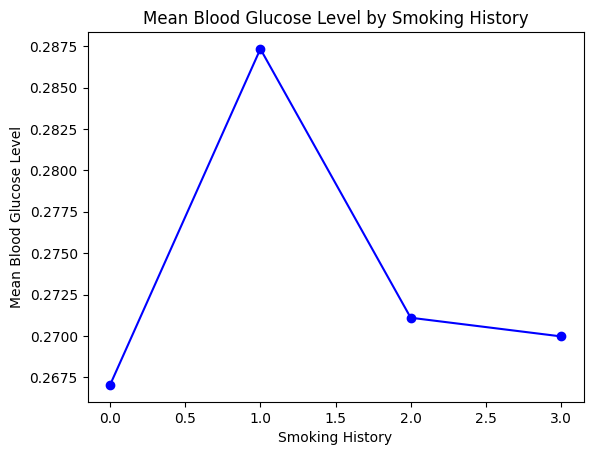

In [135]:
smoking_grouped = df.groupby('smoking_history')['blood_glucose_level'].mean()
plt.plot(smoking_grouped.index, smoking_grouped.values, marker='o', linestyle='-', color='b')
plt.xlabel('Smoking History')
plt.ylabel('Mean Blood Glucose Level')
plt.title('Mean Blood Glucose Level by Smoking History')
plt.show()

# Age Vs HbA1c Level

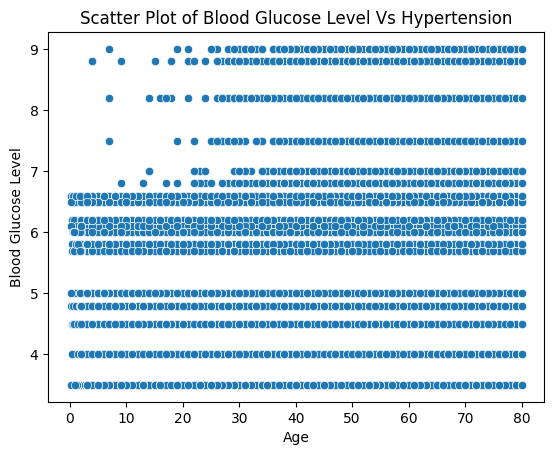

In [136]:
sns.scatterplot(data=df, x='age', y='HbA1c_level')
plt.xlabel('Age')
plt.ylabel('Blood Glucose Level')
plt.title('Scatter Plot of Blood Glucose Level Vs Hypertension')
plt.show()

# BMI Vs Blood Glucose Level

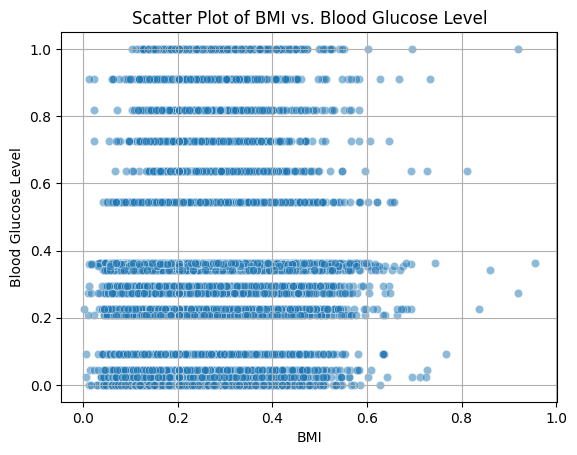

In [137]:
sns.scatterplot(data=df, x='bmi', y='blood_glucose_level', alpha=0.5)
plt.xlabel('BMI')
plt.ylabel('Blood Glucose Level')
plt.title('Scatter Plot of BMI vs. Blood Glucose Level')
plt.grid(True)

# Show the scatter plot
plt.show()

# Correlation between Attributes

In [144]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,0,0.177171,6.6,0.272727,0
2,0,28.0,0,0,0,0.202031,5.7,0.354545,0
3,0,36.0,0,0,2,0.156863,5.0,0.340909,0
4,0,76.0,1,1,2,0.118231,4.8,0.340909,0
5,0,20.0,0,0,0,0.202031,6.6,0.022727,0


In [145]:
corr_matrix = df.corr()

In [146]:
corr_matrix["diabetes"].sort_values(ascending=False)

diabetes               1.000000
blood_glucose_level    0.450888
HbA1c_level            0.437883
age                    0.263045
bmi                    0.206037
hypertension           0.194072
heart_disease          0.167190
smoking_history        0.019773
gender                      NaN
Name: diabetes, dtype: float64

array([[<Axes: xlabel='diabetes', ylabel='diabetes'>,
        <Axes: xlabel='blood_glucose_level', ylabel='diabetes'>,
        <Axes: xlabel='HbA1c_level', ylabel='diabetes'>,
        <Axes: xlabel='age', ylabel='diabetes'>],
       [<Axes: xlabel='diabetes', ylabel='blood_glucose_level'>,
        <Axes: xlabel='blood_glucose_level', ylabel='blood_glucose_level'>,
        <Axes: xlabel='HbA1c_level', ylabel='blood_glucose_level'>,
        <Axes: xlabel='age', ylabel='blood_glucose_level'>],
       [<Axes: xlabel='diabetes', ylabel='HbA1c_level'>,
        <Axes: xlabel='blood_glucose_level', ylabel='HbA1c_level'>,
        <Axes: xlabel='HbA1c_level', ylabel='HbA1c_level'>,
        <Axes: xlabel='age', ylabel='HbA1c_level'>],
       [<Axes: xlabel='diabetes', ylabel='age'>,
        <Axes: xlabel='blood_glucose_level', ylabel='age'>,
        <Axes: xlabel='HbA1c_level', ylabel='age'>,
        <Axes: xlabel='age', ylabel='age'>]], dtype=object)

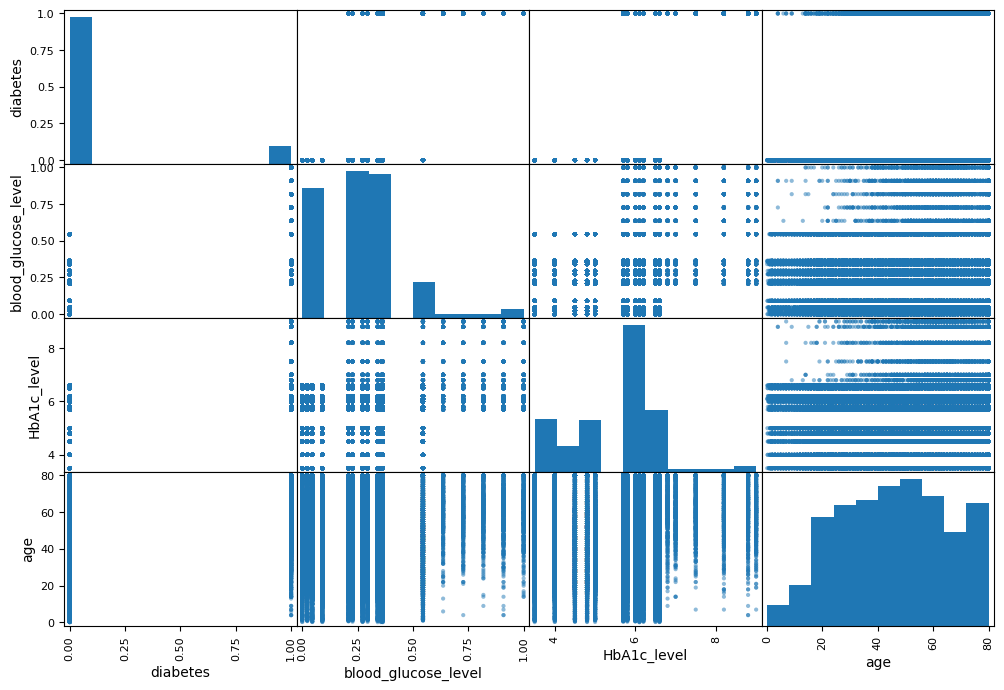

In [147]:
from pandas.plotting import scatter_matrix

attributes = ["diabetes", "blood_glucose_level", "HbA1c_level",
              "age"]
scatter_matrix(df[attributes], figsize=(12, 8))

(-2.0, 2.0, -2.0, 2.0)

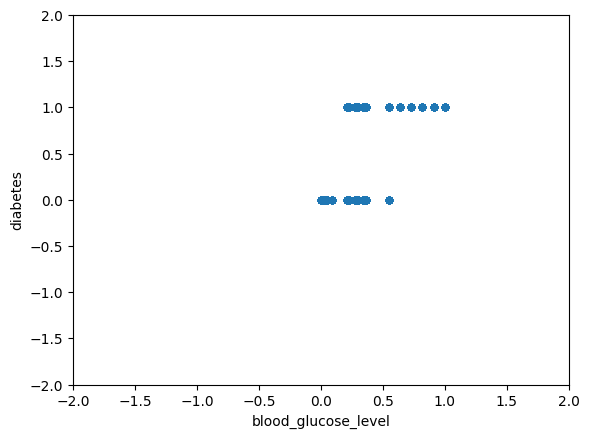

In [152]:
df.plot(kind="scatter", x="blood_glucose_level", y="diabetes")
plt.axis([-2, 2, -2, 2])